My plan;
1. Introduction.
2. Add Objectives
3.List the Features of the Data set 
4. Data Understanding.
5.

Data Understanding

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')
# Data Understanding
# loading the dataset using the compression zip


data = pd.read_csv('Data/broad_reddit_search_with_labels.csv')   # Dataset


In [2]:
class_counts = data['label'].value_counts()

# Display the counts
print(class_counts)

neutral                50616
happy                  34459
mental_health_issue     7320
Name: label, dtype: int64


<Axes: >

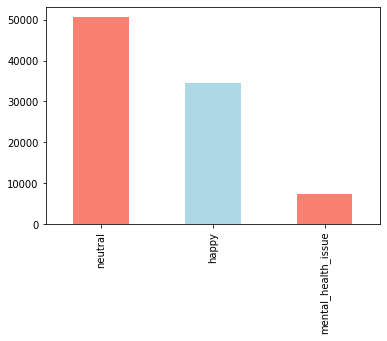

In [3]:
# Plot the results above on a bar graph 
data["label"].value_counts().plot(kind="bar", color=["salmon", "lightblue"])

In [4]:
subreddit_counts = data['subreddit'].value_counts()
print(subreddit_counts)


AskWomen              21266
CasualConversation    17925
MadeMeSmile           15766
AskMen                12909
GetMotivated           5659
happy                  4915
TrueOffMyChest         3699
BipolarReddit          3077
AskReddit              2936
Anxiety                1261
OffMyChest             1133
mentalhealth            663
SuicideWatch            608
Depression              578
Name: subreddit, dtype: int64


<Axes: >

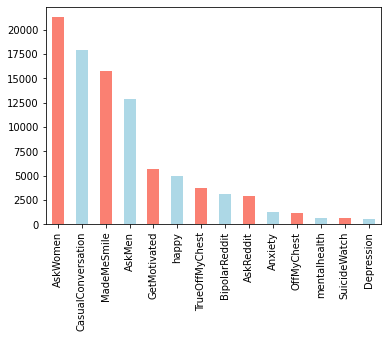

In [5]:
# Plot the results above on a bar graph 
data["subreddit"].value_counts().plot(kind="bar", color=["salmon", "lightblue"])

Count by Label and Subreddit:

Purpose: The first code helps you count how many times each label appears in each subreddit.
Outcome: A bar graph that displays the count of each label per subreddit, where each subreddit is represented by a different color.

In [6]:
label_subreddit_counts = data.groupby(['label', 'subreddit']).size()
print(label_subreddit_counts)


label                subreddit         
happy                CasualConversation     8119
                     GetMotivated           5659
                     MadeMeSmile           15766
                     happy                  4915
mental_health_issue  Anxiety                1261
                     BipolarReddit          3077
                     Depression              578
                     OffMyChest             1133
                     SuicideWatch            608
                     mentalhealth            663
neutral              AskMen                12909
                     AskReddit              2936
                     AskWomen              21266
                     CasualConversation     9806
                     TrueOffMyChest         3699
dtype: int64


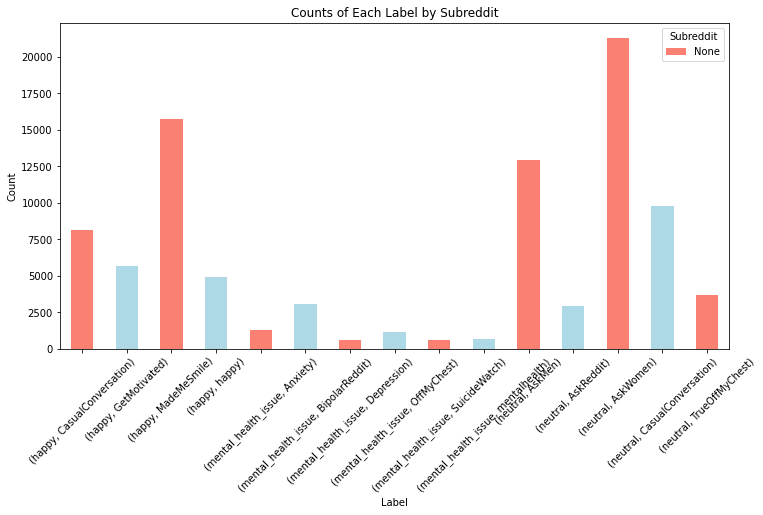

In [7]:
# Plot the results in a bar chart with separate colors for each label
label_subreddit_counts.plot(kind="bar", color=["salmon", "lightblue"], figsize=(12, 6))

# Set plot title and labels
plt.title("Counts of Each Label by Subreddit")
plt.xlabel("Label")
plt.ylabel("Count")
plt.legend(title="Subreddit")
plt.xticks(rotation=45)
plt.show()

Count of High-Score Posts:

Purpose: The second code snippet attempts to count how many "mental_health_issue" posts have a post_score greater than 10, and plot this count as a bar graph.
Outcome: A single-bar graph that shows how many "mental_health_issue" posts have a post_score greater than 10.

In [8]:
high_score_counts = data[(data['label'] == 'mental_health_issue') & (data['post_score'] > 10)].shape[0]
print(f"Count of mental_health_issue posts with post_score > 10: {high_score_counts}")


Count of mental_health_issue posts with post_score > 10: 4125


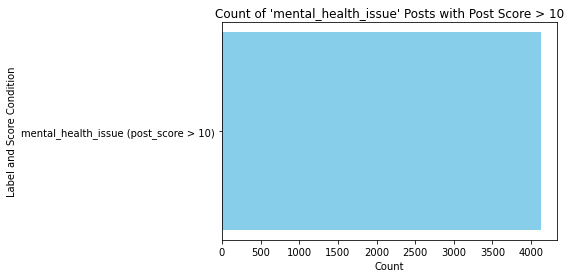

In [9]:
# Alternative bar plot
plt.barh(['mental_health_issue (post_score > 10)'], [high_score_counts], color='skyblue')
plt.title("Count of 'mental_health_issue' Posts with Post Score > 10")
plt.xlabel("Count")
plt.ylabel("Label and Score Condition")
plt.show()


In [10]:
# Check the data type of 'post_score'
print(data['post_score'].dtype)

# Check if there are any 'mental_health_issue' posts with 'post_score' > 10
filtered_data = data[(data['label'] == 'mental_health_issue') & (data['post_score'] > 10)]
print(filtered_data.head())  # Display first few rows to verify

# If 'post_score' is not numeric, convert it
if data['post_score'].dtype == 'object':
    data['post_score'] = pd.to_numeric(data['post_score'], errors='coerce')

# Re-run the high score count
high_score_counts = data[(data['label'] == 'mental_health_issue') & (data['post_score'] > 10)].shape[0]
print(f"Count of mental_health_issue posts with post_score > 10: {high_score_counts}")


int64
                         title  \
30  i hate being small chested   
31  i hate being small chested   
32  i hate being small chested   
33  i hate being small chested   
34  i hate being small chested   

                                            post_body  \
30  This shouldn’t be having such a bad impact on ...   
31  This shouldn’t be having such a bad impact on ...   
32  This shouldn’t be having such a bad impact on ...   
33  This shouldn’t be having such a bad impact on ...   
34  This shouldn’t be having such a bad impact on ...   

                                         comment_body  comment_score  \
30  You’re only 16 years old, your body isn’t done...             19   
31  Idk if this will help you feel better or not, ...             39   
32  Silver lining. Less back problems in your future.             88   
33  Do you have a mom, female family or friend you...             12   
34                        I’m 24 and they never came😭             12   

             

In [11]:
unique_authors_per_label = data.groupby('label')['author_flair_text'].nunique()
print(unique_authors_per_label)


label
happy                  10
mental_health_issue     9
neutral                18
Name: author_flair_text, dtype: int64


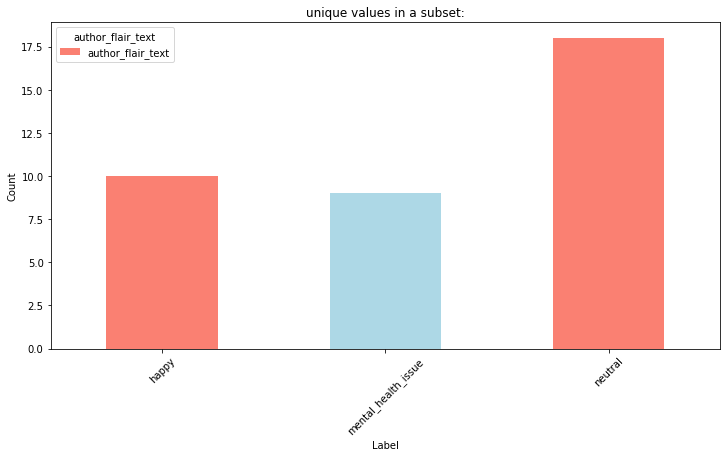

In [12]:
# Plot the results in a bar chart with separate colors for each label
unique_authors_per_label.plot(kind="bar", color=["salmon", "lightblue"], figsize=(12, 6))

# Set plot title and labels
plt.title("unique values in a subset:")
plt.xlabel("Label")
plt.ylabel("Count")
plt.legend(title="author_flair_text")
plt.xticks(rotation=45)
plt.show()

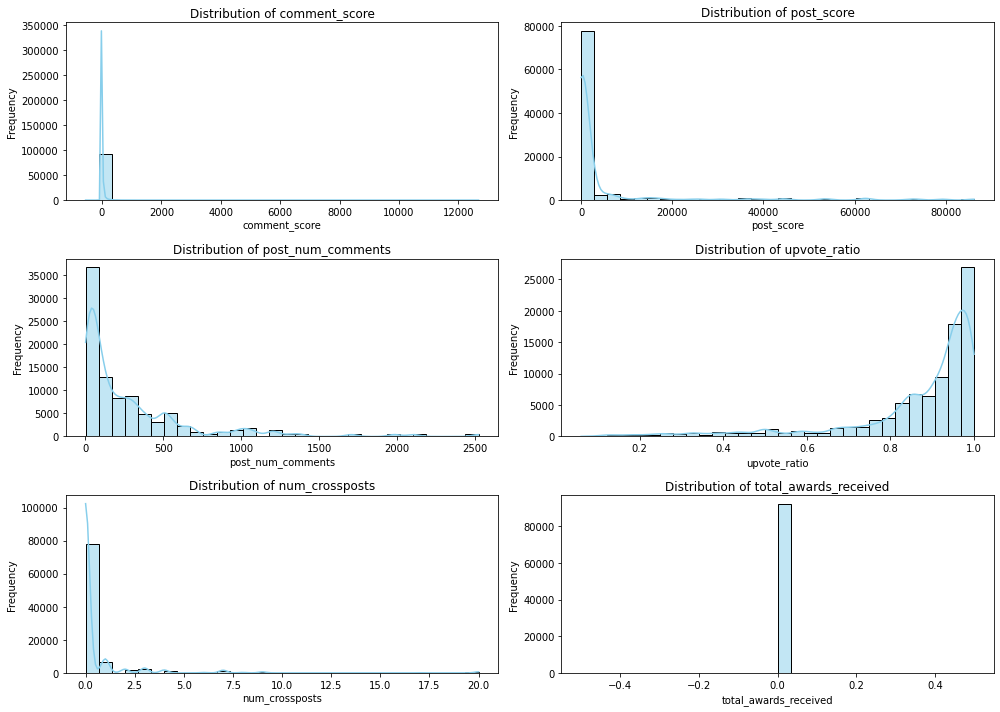

In [13]:


# Define numerical columns to visualize
numerical_features = [
    'comment_score', 'post_score', 'post_num_comments', 
    'upvote_ratio', 'num_crossposts', 'total_awards_received'
]

# Set up the matplotlib figure
plt.figure(figsize=(14, 10))

# Plot distributions for each numerical feature
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 2, i)  # Adjusted for 6 features (3 rows, 2 columns)
    sns.histplot(data[feature], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [14]:
# display the first 5 rows of the labels
data.head()


,title,post_body,comment_body,comment_score,post_url,created,subreddit,label,post_score,post_num_comments,...,author_premium,distinguished,all_awardings,num_crossposts,total_awards_received,post_thumbnail,link_flair_text,post_id,comment_id,author_flair_text
0,I don't know what's wrong with me,I'm finding it really hard to keep myself toge...,Have you got a therapist on board? Sounds like...,2,https://www.reddit.com/r/mentalhealth/comments...,1.730484e+09,mentalhealth,mental_health_issue,1,1,...,False,NaN,[],0,0,self,Venting,1ghb2bs,luw5fgj,NaN
1,Friends who distance themselves from you or cu...,Please tell me if I sound entitled or selfish....,"I think it’s a combination of factors, and I s...",2,https://www.reddit.com/r/mentalhealth/comments...,1.730480e+09,mentalhealth,mental_health_issue,1,1,...,False,NaN,[],0,0,self,Venting,1gh9prb,luvspbv,NaN
2,sometimes my brain just keeps telling me bad t...,Does anyone else ever get like this? Or have a...,"When I have a panic attack, I tend to think th...",1,https://www.reddit.com/r/mentalhealth/comments...,1.730486e+09,mentalhealth,mental_health_issue,2,2,...,False,NaN,[],0,0,self,Venting,1gh98yg,luwcwu7,NaN
3,sometimes my brain just keeps telling me bad t...,Does anyone else ever get like this? Or have a...,Im wondering if it was simply a panic attack. ...,2,https://www.reddit.com/r/mentalhealth/comments...,1.730487e+09,mentalhealth,mental_health_issue,2,2,...,False,NaN,[],0,0,self,Venting,1gh98yg,luwep2n,NaN
4,Need objective support. I’m in over my head,I feel in over my head and I’m not sure what t...,Please consider seeing a psychologist. Good luck!,1,https://www.reddit.com/r/mentalhealth/comments...,1.730477e+09,mentalhealth,mental_health_issue,1,4,...,False,NaN,[],0,0,self,Need Support,1gh8q6w,luvir86,NaN


In [15]:
print(data.columns)


Index(['title', 'post_body', 'comment_body', 'comment_score', 'post_url',
       'created', 'subreddit', 'label', 'post_score', 'post_num_comments',
       'author', 'comment_author', 'post_created', 'post_flair',
       'upvote_ratio', 'over_18', 'is_self_post', 'author_premium',
       'distinguished', 'all_awardings', 'num_crossposts',
       'total_awards_received', 'post_thumbnail', 'link_flair_text', 'post_id',
       'comment_id', 'author_flair_text'],
      dtype='object')


In [16]:
# Check for exact column names
print(data.columns.tolist())


# Check data types
print(data.dtypes)


['title', 'post_body', 'comment_body', 'comment_score', 'post_url', 'created', 'subreddit', 'label', 'post_score', 'post_num_comments', 'author', 'comment_author', 'post_created', 'post_flair', 'upvote_ratio', 'over_18', 'is_self_post', 'author_premium', 'distinguished', 'all_awardings', 'num_crossposts', 'total_awards_received', 'post_thumbnail', 'link_flair_text', 'post_id', 'comment_id', 'author_flair_text']
title                     object
post_body                 object
comment_body              object
comment_score              int64
post_url                  object
created                  float64
subreddit                 object
label                     object
post_score                 int64
post_num_comments          int64
author                    object
comment_author            object
post_created             float64
post_flair                object
upvote_ratio             float64
over_18                     bool
is_self_post                bool
author_premium          

In [17]:
# Check for duplicates
print(data['post_id'].duplicated().sum())

# Display first few rows of each DataFrame
print(data.head())


89507
                                               title  \
0                  I don't know what's wrong with me   
1  Friends who distance themselves from you or cu...   
2  sometimes my brain just keeps telling me bad t...   
3  sometimes my brain just keeps telling me bad t...   
4        Need objective support. I’m in over my head   

                                           post_body  \
0  I'm finding it really hard to keep myself toge...   
1  Please tell me if I sound entitled or selfish....   
2  Does anyone else ever get like this? Or have a...   
3  Does anyone else ever get like this? Or have a...   
4  I feel in over my head and I’m not sure what t...   

                                        comment_body  comment_score  \
0  Have you got a therapist on board? Sounds like...              2   
1  I think it’s a combination of factors, and I s...              2   
2  When I have a panic attack, I tend to think th...              1   
3  Im wondering if it was simply a p

In [18]:
# Check for duplicates
print(data['comment_id'].duplicated().sum())

# Display first few rows of each DataFrame
print(data.head())

1330
                                               title  \
0                  I don't know what's wrong with me   
1  Friends who distance themselves from you or cu...   
2  sometimes my brain just keeps telling me bad t...   
3  sometimes my brain just keeps telling me bad t...   
4        Need objective support. I’m in over my head   

                                           post_body  \
0  I'm finding it really hard to keep myself toge...   
1  Please tell me if I sound entitled or selfish....   
2  Does anyone else ever get like this? Or have a...   
3  Does anyone else ever get like this? Or have a...   
4  I feel in over my head and I’m not sure what t...   

                                        comment_body  comment_score  \
0  Have you got a therapist on board? Sounds like...              2   
1  I think it’s a combination of factors, and I s...              2   
2  When I have a panic attack, I tend to think th...              1   
3  Im wondering if it was simply a pa

In [19]:
import pandas as pd

def data_shape(data):
    """Simple function to provide the shape of the data"""
    print(f"The DataFrame has:\n\t* {data.shape[0]} rows\n\t* {data.shape[1]} columns")

# Example usage:
# Assuming you have a DataFrame named 'df'
# data_shape(df)

In [20]:
def data_info(data):
    """Simple function to provide the info of the data"""
    print(data.info(), '\n')
    

In [21]:
def print_column_types(data):
    """Print categorical and numerical columns in a dataset"""
    # Identify categorical and numerical columns
    categorical_cols = []
    numerical_cols = []
    
    for column in data.columns:
        if data[column].dtype == 'object':
            categorical_cols.append(column)
        else:
            numerical_cols.append(column)
    
    # Print categorical columns
    out = print(f"Categorical Columns:", categorical_cols,'\n')
     
    # Print numerical columns
    out = print(f"Numerical Columns:", numerical_cols,'\n')
    
    return out 

In [22]:
import numpy as np  # Ensure NumPy is imported for rounding

def identify_duplicates(data):
    """Identify and report the number of duplicate rows in the DataFrame."""
    # Count duplicated rows directly using pandas
    num_duplicates = data.duplicated().sum()
    
    if num_duplicates == 0:
        print("The Data has no duplicates.\n")
    else:
        # Calculate percentage of duplicated rows
        duplicates_percentage = np.round((num_duplicates / len(data)) * 100, 3)
        print(f"The Data has {num_duplicates} duplicated rows.")
        print(f"This constitutes {duplicates_percentage}% of the data set.\n")

# Example usage:
# Assuming you have a DataFrame named 'df'
# identify_duplicates(df)

In [23]:
def data_describe(data):
    """Simple function to check the descriptive values of the data"""
    print(data.describe(), '\n')

In [24]:
# helper function to check for unique values in a column
def find_unique_values(data):
        print(data.nunique(),'\n')
    

In [25]:
def explore(data):
    """Group of functions to explore data """
    data_shape(data)
    data_info(data)
    print_column_types(data)
    data_describe(data)

In [26]:
explore(data)


The DataFrame has:
	* 92395 rows
	* 27 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92395 entries, 0 to 92394
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  92395 non-null  object 
 1   post_body              63730 non-null  object 
 2   comment_body           92395 non-null  object 
 3   comment_score          92395 non-null  int64  
 4   post_url               92395 non-null  object 
 5   created                92395 non-null  float64
 6   subreddit              92395 non-null  object 
 7   label                  92395 non-null  object 
 8   post_score             92395 non-null  int64  
 9   post_num_comments      92395 non-null  int64  
 10  author                 92395 non-null  object 
 11  comment_author         92395 non-null  object 
 12  post_created           92395 non-null  float64
 13  post_flair             35211 non-null  object 
 14  upvote_

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92395 entries, 0 to 92394
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  92395 non-null  object 
 1   post_body              63730 non-null  object 
 2   comment_body           92395 non-null  object 
 3   comment_score          92395 non-null  int64  
 4   post_url               92395 non-null  object 
 5   created                92395 non-null  float64
 6   subreddit              92395 non-null  object 
 7   label                  92395 non-null  object 
 8   post_score             92395 non-null  int64  
 9   post_num_comments      92395 non-null  int64  
 10  author                 92395 non-null  object 
 11  comment_author         92395 non-null  object 
 12  post_created           92395 non-null  float64
 13  post_flair             35211 non-null  object 
 14  upvote_ratio           92395 non-null  float64
 15  ov

In [28]:
# Are there any missing values?
data.isna().sum()

title                        0
post_body                28665
comment_body                 0
comment_score                0
post_url                     0
created                      0
subreddit                    0
label                        0
post_score                   0
post_num_comments            0
author                       0
comment_author               0
post_created                 0
post_flair               57184
upvote_ratio                 0
over_18                      0
is_self_post                 0
author_premium               0
distinguished            92395
all_awardings                0
num_crossposts               0
total_awards_received        0
post_thumbnail               0
link_flair_text          57184
post_id                      0
comment_id                   0
author_flair_text        87880
dtype: int64

Analysis
High Missing Values (Candidates for Dropping):

post_flair (57,184 missing values)

distinguished (92,395 missing values)

link_flair_text (57,184 missing values)

author_flair_text (87,880 missing values)

This are a quick drop as  we analyse other columns further.

Columns with 0 Missing Values we (Retain):

These include essential columns like title, label, subreddit, post_score, etc., which are likely critical for analysis.

3. Data Preparation

Load the Data and Inspect Column Names

Get a sense of the data by checking column names and understanding their descriptions.

In [30]:


# Display column names and sample data
print("Column Names:", data.columns)
print(data.head())


Column Names: Index(['title', 'post_body', 'comment_body', 'comment_score', 'post_url',
       'created', 'subreddit', 'label', 'post_score', 'post_num_comments',
       'author', 'comment_author', 'post_created', 'post_flair',
       'upvote_ratio', 'over_18', 'is_self_post', 'author_premium',
       'distinguished', 'all_awardings', 'num_crossposts',
       'total_awards_received', 'post_thumbnail', 'link_flair_text', 'post_id',
       'comment_id', 'author_flair_text'],
      dtype='object')
                                               title  \
0                  I don't know what's wrong with me   
1  Friends who distance themselves from you or cu...   
2  sometimes my brain just keeps telling me bad t...   
3  sometimes my brain just keeps telling me bad t...   
4        Need objective support. I’m in over my head   

                                           post_body  \
0  I'm finding it really hard to keep myself toge...   
1  Please tell me if I sound entitled or selfish...

Often, columns with similar names might hold related or overlapping information.
python
Copy code


In [31]:
similar_columns = [col for col in data.columns if 'keyword' in col.lower() or 'label' in col.lower()]
print("Columns with similar names:", similar_columns)


Columns with similar names: ['label']


Check for High Correlation (for Numeric Columns)

Calculate the correlation matrix to find highly correlated numeric columns (correlation close to +1 or -1).

In [33]:
# Selecting only numerical columns
numeric_df = data.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()

# Identify pairs of highly correlated columns
high_corr_pairs = [(col1, col2) for col1 in correlation_matrix.columns for col2 in correlation_matrix.columns if col1 != col2 and abs(correlation_matrix.loc[col1, col2]) > 0.8]
print("Highly correlated column pairs:", high_corr_pairs)


Highly correlated column pairs: [('created', 'post_created'), ('post_created', 'created')]


Compare Unique Values in Categorical Columns

For categorical columns, check if they contain similar unique values, which may indicate overlapping information

In [37]:
# Selecting only categorical columns
categorical_data = data.select_dtypes(include='object')
for col in categorical_data.columns:
    print(f"Unique values in '{col}': {categorical_data[col].nunique()}")

# Example of comparing two columns directly
# Adjust as needed if there are specific columns to compare
overlap_cats = [(col1, col2) for col1 in categorical_data.columns for col2 in categorical_data.columns if col1 != col2 and set(data[col1]) == set(data[col2])]
print("Categorical columns with identical unique values:", overlap_cats)


Unique values in 'title': 2874
Unique values in 'post_body': 2260
Unique values in 'comment_body': 84845
Unique values in 'post_url': 2887
Unique values in 'subreddit': 14
Unique values in 'label': 3
Unique values in 'author': 2587
Unique values in 'comment_author': 47459
Unique values in 'post_flair': 86
Unique values in 'all_awardings': 1
Unique values in 'post_thumbnail': 447
Unique values in 'link_flair_text': 86
Unique values in 'post_id': 2888
Unique values in 'comment_id': 91065
Unique values in 'author_flair_text': 33
Categorical columns with identical unique values: [('post_flair', 'link_flair_text'), ('link_flair_text', 'post_flair')]


Find Duplicated Columns (Exact Copies)

Some columns might be exact duplicates of each other, especially after data extraction or merging.

In [39]:
duplicate_columns = []
for i in range(len(data.columns)):
    for j in range(i + 1, len(data.columns)):
        if data.iloc[:, i].equals(data.iloc[:, j]):
            duplicate_columns.append((data.columns[i], data.columns[j]))

print("Duplicate columns:", duplicate_columns)


Duplicate columns: [('post_flair', 'link_flair_text')]


Go ahead.
Examining Unique Values and Sample Rows: Check a few rows and the unique values in each column to confirm whether created and post_created contain identical or near-identical timestamps.

In [41]:
print("Unique values in 'created':", data['created'].nunique())
print("Unique values in 'post_created':", data['post_created'].nunique())

# Display a sample of these columns
data[['created', 'post_created']].head(10)


Unique values in 'created': 89626
Unique values in 'post_created': 2887


,created,post_created
0,1.730484e+09,1.730482e+09
1,1.730480e+09,1.730479e+09
2,1.730486e+09,1.730478e+09
3,1.730487e+09,1.730478e+09
4,1.730477e+09,1.730477e+09
5,1.730484e+09,1.730477e+09
6,1.730477e+09,1.730477e+09
7,1.730477e+09,1.730477e+09
8,1.730469e+09,1.730468e+09
9,1.730469e+09,1.730468e+09


Checking Distribution of Comments per Post:

 checking how many comments are associated with each unique 'post_created' timestamp to understand activity levels per post.

In [42]:
# Counting comments per post creation timestamp
comments_per_post = data.groupby('post_created').size()
print(comments_per_post.describe())  # Gives an idea of the distribution


count    2887.000000
mean       32.003810
std        75.143206
min         1.000000
25%         3.000000
50%         8.000000
75%        26.000000
max       770.000000
dtype: float64


This distribution indicates that each unique post_created timestamp has a varying number of comments associated with it:

Mean (32): On average, there are about 32 comments per unique post timestamp.

Standard Deviation (75): The high standard deviation shows substantial variation in comment count per post, with some posts having significantly more comments than others.

Minimum (1): Some posts have only 1 comment.

25th Percentile (3) and Median (8): Half of the posts have fewer than 8 comments, suggesting that most posts receive relatively few comments.

75th Percentile (26): 75% of posts have 26 comments or fewer.

Maximum (770): The most commented post has 770 comments, indicating a few highly active posts skewing the distribution.

Lets create a visualised skewed destribution to check the spread and skewness.

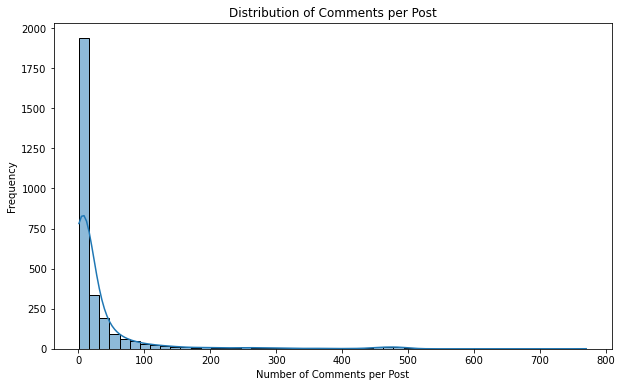

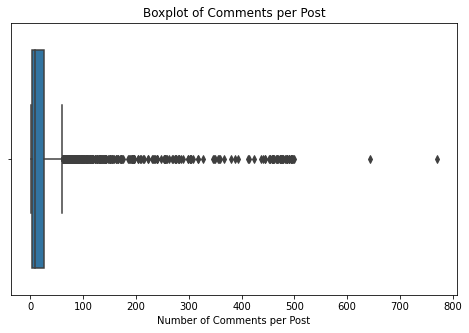

In [43]:


# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(comments_per_post, bins=50, kde=True)
plt.xlabel('Number of Comments per Post')
plt.ylabel('Frequency')
plt.title('Distribution of Comments per Post')
plt.show()

# Boxplot for Outlier Detection
plt.figure(figsize=(8, 5))
sns.boxplot(x=comments_per_post)
plt.xlabel('Number of Comments per Post')
plt.title('Boxplot of Comments per Post')
plt.show()


The histogram shows that the distribution of comments per post is highly skewed, with most posts having a low number of comments and a few posts receiving very high numbers of comments. This is common in datasets with social media metrics, where most posts get relatively little interaction, and a few go "viral" or receive a lot of attention.


The boxplot confirms the presence of significant outliers, as shown by points well beyond the whiskers of the boxplot. These outliers correspond to posts with very high comment counts.

The next step is checking variance in each columns.

In [ ]:
missing_values = data.isnull().sum()


#  Check variance in each column
low_variance_cols = [col for col in data.columns if data[col].nunique() <= 1]
print("Low variance columns:", low_variance_cols)

#  Drop columns with excessive missing values or low variance
columns_to_drop = missing_values[missing_values > 0.5 * len(data)].index.tolist() + low_variance_cols
print("Columns to drop:", columns_to_drop)

# Drop the identified columns (if this is the intent)
data_cleaned = data.drop(columns=columns_to_drop, errors='ignore')


Low variance columns: ['distinguished', 'all_awardings', 'total_awards_received']
Columns to drop: ['post_flair', 'distinguished', 'link_flair_text', 'author_flair_text', 'distinguished', 'all_awardings', 'total_awards_received']


The above has provided columns with low variance and suggested the ones to drop

The above with the addition of colums to drop we create a consolidated list.

DROPPING COLUMNS

In [77]:
columns_to_drop = [
    'post_flair',
    'distinguished', 
     'distinguised',# Listed twice but handled once in drop
    'link_flair_text',
    'author_flair_text',
    'all_awardings',
    'total_awards_received'
    'total_awards_received'
]

# Drop these columns from the DataFrame
data_cleaned = data.drop(columns=columns_to_drop, errors='ignore')


Rationale

post_flair, distinguished, link_flair_text, author_flair_text: High missing values (>50%), not useful for analysis.

all_awardings, total_awards_received: Low variance, likely uninformative for distinguishing posts or comments.

In [49]:
dfn = data.drop(columns_to_drop, axis = 1)
dfn.shape

(92395, 21)

In [50]:
print_column_types(dfn)

Categorical Columns: ['title', 'post_body', 'comment_body', 'post_url', 'subreddit', 'label', 'author', 'comment_author', 'post_thumbnail', 'post_id', 'comment_id'] 

Numerical Columns: ['comment_score', 'created', 'post_score', 'post_num_comments', 'post_created', 'upvote_ratio', 'over_18', 'is_self_post', 'author_premium', 'num_crossposts'] 



4.Data Cleaning(handling missing values, duplicates and outliers-show visualizations)

In [51]:
# helper function to check for missing values

def data_missing(data):
    """Identify if the data has missing values"""
    # identify columns with missing values
    missing_cols = data.columns[data.isnull().any()]
    # calculate number of missing values in each column
    missing_sum = data[missing_cols].isnull().sum()
    # calculate percentage of missing values in each column
    missing_pct = data[missing_cols].isnull().sum() / data.shape[0] * 100

    # check if there are missing values
    if len(missing_cols) == 0:
        out = print("The data has no missing values.")
    else:
        out = print(f"The data has missing values in the following columns:\n{missing_cols}\n\nThe total number of missing values in each column:\n{missing_sum}\n \n{missing_pct}\n")
    return out

In [52]:
data_missing(dfn)

The data has missing values in the following columns:
Index(['post_body'], dtype='object')

The total number of missing values in each column:
post_body    28665
dtype: int64
 
post_body    31.024406
dtype: float64



I will keep it to analyse if it will impact our data
But i will fill the missing values with a place holder.

In [53]:
data['post_body'].fillna("Missing", inplace=True)


recheck.

In [55]:
data['post_body'].isnull().sum()

0

this confirms that there are no missing values in the column.

DUPLICATED DATA

In [56]:
# helper function to check for duplicates

def identify_duplicates(data):
    """Simple function to identify any duplicates"""
    # identify the duplicates (dataframename.duplicated() , can add .sum() to get total count)
    # empty list to store Bool results from duplicated
    duplicates = []
    for i in data.duplicated():
        duplicates.append(i)
    # identify if there is any duplicates. (If there is any we expect a True value in the list duplicates)
    duplicates_set = set(duplicates) 
    if (len(duplicates_set) == 1):
        out = print("The Data has no duplicates", '\n')
    else:
        no_true = 0
        for val in duplicates:
            if (val == True):
                no_true += 1
        # percentage of the data represented by duplicates 
        duplicates_percentage = np.round(((no_true / len(data)) * 100), 3)
        out = print(f"The Data has {no_true} duplicated rows.\nThis constitutes {duplicates_percentage}% of the data set.", '\n')

In [57]:
identify_duplicates(dfn)

The Data has no duplicates 



Outliers

Outliers are data points that significantly deviate from the majority of the other data points in a dataset.

There can be several causes for the presence of outliers:

Natural variation

Data entry errors

Anomalous observations

Sampling issues

Data processing errors

In [60]:


def evaluate_outliers(data, sample_size=1000, columns_per_row=3):
    """Function to evaluate outliers in numeric columns and plot their distributions side by side."""
    
    # Select numeric columns
    numeric_columns = data.select_dtypes(include='number').columns
    
    # Randomly sample the data
    data_sample = data.sample(n=min(sample_size, len(data)), random_state=42)
    
    # Calculate the number of rows needed
    num_plots = len(numeric_columns)
    num_rows = (num_plots + columns_per_row - 1) // columns_per_row  # Round up division
    
    # Create subplots
    fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(columns_per_row * 5, num_rows * 4))
    axes = axes.flatten()  # Flatten in case of single row

    # Iterate over numeric columns and create boxplots
    for i, column in enumerate(numeric_columns):
        ax = axes[i]
        ax.boxplot(data_sample[column], notch=True, sym='r.')
        ax.set_xlabel(column)
        ax.set_ylabel('Value')
        ax.set_title(f'Boxplot of {column}')
    
    # Turn off any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()


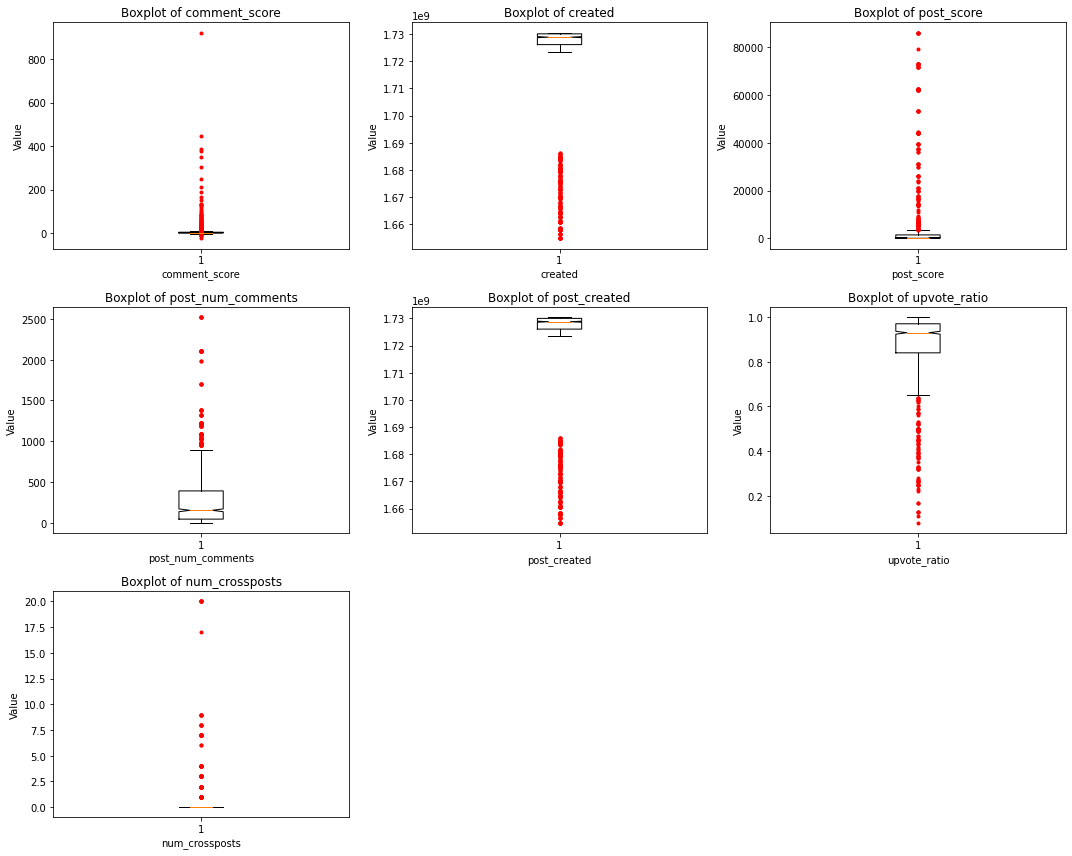

In [61]:
evaluate_outliers(dfn)

Observations:

The presence of outliers is visible as red points beyond the whiskers in all boxplots.

Most of the data points for these variables are concentrated near the lower end of the scale (e.g., comment_score, post_score).

Variables such as created and post_created appear to represent timestamps, with less variability in their distributions.

It would be helpful to further investigate the underlying data for these variables, focusing on extreme values or unusual patterns.

StATISTICAL IDENTIFICATION OF OUTLIERS

In [65]:

# Example: Assuming `df` is your DataFrame
def detect_outliers(df, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(df[column] < lower_bound) | (data[column] > upper_bound)]

# Check outliers for a specific column
outliers_comment_score = detect_outliers(data, 'comment_score')
print(outliers_comment_score)


                                                   title  \
30                            i hate being small chested   
31                            i hate being small chested   
32                            i hate being small chested   
33                            i hate being small chested   
34                            i hate being small chested   
...                                                  ...   
92376  What is a mental health tip you thought was BS...   
92380  What is a mental health tip you thought was BS...   
92381  What is a mental health tip you thought was BS...   
92382  What is a mental health tip you thought was BS...   
92383  What is a mental health tip you thought was BS...   

                                               post_body  \
30     This shouldn’t be having such a bad impact on ...   
31     This shouldn’t be having such a bad impact on ...   
32     This shouldn’t be having such a bad impact on ...   
33     This shouldn’t be having such a 

INVESTIGATE OUTLIERS

In [66]:
# View extreme rows
print(outliers_comment_score[['comment_score', 'post_score', 'upvote_ratio']])


       comment_score  post_score  upvote_ratio
30                19          58          0.84
31                39          58          0.84
32                88          58          0.84
33                12          58          0.84
34                12          58          0.84
...              ...         ...           ...
92376             30        2305          0.99
92380             67        2305          0.99
92381             29        2305          0.99
92382             27        2305          0.99
92383             27        2305          0.99

[14907 rows x 3 columns]


3. Visualize Outliers in Context
VISUALIZE OUTLIERS IN CONTEXT

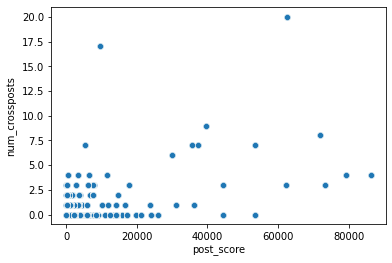

In [67]:


# Example: Visualize the relationship between post_score and num_crossposts
sns.scatterplot(data=data, x='post_score', y='num_crossposts')
plt.show()


 Investigate High-Impact Data Points

Filtering

In [69]:
filtered_df = data[~data.index.isin(outliers_comment_score.index)]


Transformations: Apply log transformation for variables with large scales.




In [70]:
data['log_post_score'] = np.log1p(data['post_score'])


In [75]:
# Correlation matrix
correlation_matrix = data.corr()
print(correlation_matrix)



                       comment_score   created  post_score  post_num_comments  \
comment_score               1.000000 -0.024023    0.062483           0.086523   
created                    -0.024023  1.000000    0.165345          -0.176349   
post_score                  0.062483  0.165345    1.000000           0.508231   
post_num_comments           0.086523 -0.176349    0.508231           1.000000   
post_created               -0.023839  0.999893    0.165456          -0.175934   
upvote_ratio                0.031621 -0.014709    0.142600           0.227047   
over_18                     0.023704 -0.983089   -0.166038           0.174339   
is_self_post               -0.041081 -0.287788   -0.577749          -0.123657   
author_premium              0.011597  0.054919    0.051891          -0.040679   
distinguished                    NaN       NaN         NaN                NaN   
num_crossposts              0.064917  0.113843    0.637860           0.350857   
total_awards_received       